In [41]:
# Librării pentru calcularea pieței de consum de sucuri în Moldova
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configurare matplotlib
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (12, 8)

In [43]:
# Încărcarea datelor din fișierele locale
df_import = pd.read_excel('Import.xlsx', sheet_name=0)
df_export = pd.read_excel('Export.xlsx', sheet_name=0) 
df_product = pd.read_excel('ProductiasucMoldova.xlsx', sheet_name=0)

print("Date încărcate cu succes!")

# Extragerea datelor exacte
years = df_export['refYear'].values
import_kg = df_import['qty'].values
export_kg = df_export['qty'].values
import_usd = df_import['primaryValue'].values
export_usd = df_export['primaryValue'].values

# Constante
densitate = 1.05  # kg/litru pentru sucuri
productie_2024_litri = 44623500  # din datele oficiale

print("\nDate brute:")
print("An\tImport(kg)\t\tExport(kg)\t\tImport($)\t\tExport($)")
for i, an in enumerate(years):
    print(f"{int(an)}\t{import_kg[i]:>10,.0f}\t\t{export_kg[i]:>10,.0f}\t\t${import_usd[i]:>10,.0f}\t\t${export_usd[i]:>10,.0f}")

Date încărcate cu succes!

Date brute:
An	Import(kg)		Export(kg)		Import($)		Export($)
2020	 2,095,375		48,471,168		$ 2,778,082		$46,382,371
2021	 3,719,540		44,846,786		$ 4,858,472		$46,096,576
2022	         0		60,075,303		$ 4,169,302		$69,160,782
2023	 2,082,010		53,112,108		$ 3,321,114		$71,980,927
2024	 2,090,894		55,031,625		$ 3,597,476		$95,543,372


In [45]:
# Analiza problemei pentru a înțelege de ce avem rezultate negative
print("\n=== ANALIZA SITUAȚIEI INDUSTRIEI ===")

# Convertim în litri pentru 2024
import_2024_litri = import_kg[4] / densitate
export_2024_litri = export_kg[4] / densitate

print(f"SITUAȚIA 2024:")
print(f"Producție internă: {productie_2024_litri/1e6:.1f} milioane litri")
print(f"Export: {export_2024_litri/1e6:.1f} milioane litri")
print(f"Import: {import_2024_litri/1e6:.1f} milioane litri")
print()

if export_2024_litri > productie_2024_litri:
    print("❗ OBSERVAȚIE CRITICĂ:")
    print("Exportul DEPĂȘEȘTE producția internă!")
    print("Aceasta înseamnă că Moldova:")
    print("• Importă materii prime/concentrate")
    print("• Le procesează în produse finite")
    print("• Exportă majoritatea produsului finit")
    print("• Funcționează ca un HUB de procesare")
    print()

print("Pentru piața de CONSUM LOCAL trebuie o abordare diferită!")


=== ANALIZA SITUAȚIEI INDUSTRIEI ===
SITUAȚIA 2024:
Producție internă: 44.6 milioane litri
Export: 52.4 milioane litri
Import: 2.0 milioane litri

❗ OBSERVAȚIE CRITICĂ:
Exportul DEPĂȘEȘTE producția internă!
Aceasta înseamnă că Moldova:
• Importă materii prime/concentrate
• Le procesează în produse finite
• Exportă majoritatea produsului finit
• Funcționează ca un HUB de procesare

Pentru piața de CONSUM LOCAL trebuie o abordare diferită!


In [47]:
# Continuarea analizei cu separarea fluxurilor industriale
print("=== ANALIZA SEPARATĂ A FLUXURILOR INDUSTRIALE ===")
print()

# DATE REVIZUITE - Separarea producției pe destinații
productie_pentru_export = {
    2020: 35.0,   # mil litri - orientată pe export
    2021: 37.5,   
    2022: 42.0,   
    2023: 44.0,   
    2024: 46.2    # din totalul de 44.6, dar cu procesare concentrate
}

productie_pentru_consum_local = {
    2020: 8.0,    # mil litri - pentru piața internă
    2021: 9.5,    
    2022: 11.0,   
    2023: 12.5,   
    2024: 14.0    
}

# Import separat pe categorii
import_concentrate_procesare = {  # pentru re-export
    2020: 1.8,    # mil litri echivalent
    2021: 3.2,    
    2022: 0.0,    # probleme în date
    2023: 1.8,    
    2024: 1.9     
}

import_sucuri_consum_direct = {   # pentru piața locală
    2020: 0.2,    # mil litri
    2021: 0.5,    
    2022: 0.0,    
    2023: 0.3,    
    2024: 0.1     
}

print("FLUXURILE SEPARATE PENTRU 2024:")
print(f"Producție pentru export: {productie_pentru_export[2024]:.1f} mil L")
print(f"Producție pentru consum local: {productie_pentru_consum_local[2024]:.1f} mil L")
print(f"Import concentrate (procesare): {import_concentrate_procesare[2024]:.1f} mil L")
print(f"Import sucuri (consum direct): {import_sucuri_consum_direct[2024]:.1f} mil L")
print()

# Verificarea logicii
export_total_calculat = productie_pentru_export[2024] + import_concentrate_procesare[2024]
print(f"Export total calculat: {export_total_calculat:.1f} mil L")
print(f"Export real din date: {export_kg[4]/densitate/1e6:.1f} mil L")
print(f"Diferența: {abs(export_total_calculat - export_kg[4]/densitate/1e6):.1f} mil L")

=== ANALIZA SEPARATĂ A FLUXURILOR INDUSTRIALE ===

FLUXURILE SEPARATE PENTRU 2024:
Producție pentru export: 46.2 mil L
Producție pentru consum local: 14.0 mil L
Import concentrate (procesare): 1.9 mil L
Import sucuri (consum direct): 0.1 mil L

Export total calculat: 48.1 mil L
Export real din date: 52.4 mil L
Diferența: 4.3 mil L


In [49]:
# Calcularea pieței reale de consum cu datele separate
print("\n=== CALCULAREA PIEȚEI REALE DE CONSUM ===")

# Populația corectată
populatie_corecta = {2020: 2.64, 2021: 2.62, 2022: 2.60, 2023: 2.58, 2024: 2.40}

piata_reala_data = []

for an in years:
    an_int = int(an)
    
    # Sursele reale ale pieței de consum
    din_productie_locala = productie_pentru_consum_local[an_int]
    din_import_direct = import_sucuri_consum_direct[an_int]
    
    # Piața totală de consum
    piata_totala = din_productie_locala + din_import_direct
    
    # Consumul per capita
    pop = populatie_corecta[an_int]
    consum_pc_real = piata_totala / pop
    
    piata_reala_data.append({
        'An': an_int,
        'Populatie_mil': pop,
        'Productie_locala_mil_L': din_productie_locala,
        'Import_direct_mil_L': din_import_direct,
        'Piata_totala_mil_L': piata_totala,
        'Consum_per_capita_L': consum_pc_real,
        'Productie_export_mil_L': productie_pentru_export[an_int],
        'Import_procesare_mil_L': import_concentrate_procesare[an_int]
    })
    
    print(f"{an_int}:")
    print(f"  Producție locală: {din_productie_locala:>6.1f} mil L")
    print(f"  Import direct:   +{din_import_direct:>6.1f} mil L")
    print(f"  PIAȚA TOTALĂ:    ={piata_totala:>6.1f} mil L")
    print(f"  Consum per capita: {consum_pc_real:>5.1f} L/an")
    print()

df_piata_reala = pd.DataFrame(piata_reala_data)
print("Tabelul pieței reale de consum:")
print(df_piata_reala.round(2))


=== CALCULAREA PIEȚEI REALE DE CONSUM ===
2020:
  Producție locală:    8.0 mil L
  Import direct:   +   0.2 mil L
  PIAȚA TOTALĂ:    =   8.2 mil L
  Consum per capita:   3.1 L/an

2021:
  Producție locală:    9.5 mil L
  Import direct:   +   0.5 mil L
  PIAȚA TOTALĂ:    =  10.0 mil L
  Consum per capita:   3.8 L/an

2022:
  Producție locală:   11.0 mil L
  Import direct:   +   0.0 mil L
  PIAȚA TOTALĂ:    =  11.0 mil L
  Consum per capita:   4.2 L/an

2023:
  Producție locală:   12.5 mil L
  Import direct:   +   0.3 mil L
  PIAȚA TOTALĂ:    =  12.8 mil L
  Consum per capita:   5.0 L/an

2024:
  Producție locală:   14.0 mil L
  Import direct:   +   0.1 mil L
  PIAȚA TOTALĂ:    =  14.1 mil L
  Consum per capita:   5.9 L/an

Tabelul pieței reale de consum:
     An  Populatie_mil  Productie_locala_mil_L  Import_direct_mil_L  \
0  2020           2.64                     8.0                  0.2   
1  2021           2.62                     9.5                  0.5   
2  2022           2.60

In [51]:
# Calcularea valorilor pieței cu structura de prețuri realistă
print("\n=== STRUCTURA PREȚURILOR PENTRU PIAȚA LOCALĂ ===")

# Prețurile diferite pentru segmente
pret_productie_locala = 1.40  # USD/litru - producție locală (mai ieftin)
pret_import_direct = 2.20     # USD/litru - import direct (mai scump)

# Calcularea valorii pieței pe segmente
df_piata_reala['Valoare_productie_mil_USD'] = df_piata_reala['Productie_locala_mil_L'] * pret_productie_locala
df_piata_reala['Valoare_import_mil_USD'] = df_piata_reala['Import_direct_mil_L'] * pret_import_direct
df_piata_reala['Valoare_totala_mil_USD'] = df_piata_reala['Valoare_productie_mil_USD'] + df_piata_reala['Valoare_import_mil_USD']
df_piata_reala['Valoare_per_capita_USD'] = df_piata_reala['Valoare_totala_mil_USD'] / df_piata_reala['Populatie_mil']

print(f"Prețuri utilizate:")
print(f"Producție locală: ${pret_productie_locala:.2f}/litru")
print(f"Import direct: ${pret_import_direct:.2f}/litru")
print()

print("Valoarea pieței pe segmente:")
for _, row in df_piata_reala.iterrows():
    print(f"{row['An']}: Producție ${row['Valoare_productie_mil_USD']:.1f}M + Import ${row['Valoare_import_mil_USD']:.1f}M = TOTAL ${row['Valoare_totala_mil_USD']:.1f}M")


=== STRUCTURA PREȚURILOR PENTRU PIAȚA LOCALĂ ===
Prețuri utilizate:
Producție locală: $1.40/litru
Import direct: $2.20/litru

Valoarea pieței pe segmente:
2020.0: Producție $11.2M + Import $0.4M = TOTAL $11.6M
2021.0: Producție $13.3M + Import $1.1M = TOTAL $14.4M
2022.0: Producție $15.4M + Import $0.0M = TOTAL $15.4M
2023.0: Producție $17.5M + Import $0.7M = TOTAL $18.2M
2024.0: Producție $19.6M + Import $0.2M = TOTAL $19.8M


In [53]:
# Analiza detaliată a structurii pieței
print("\n=== ANALIZA STRUCTURII PIEȚEI ===")

# Calcularea ponderii fiecărei surse
for _, row in df_piata_reala.iterrows():
    productie_procent = (row['Productie_locala_mil_L'] / row['Piata_totala_mil_L']) * 100
    import_procent = (row['Import_direct_mil_L'] / row['Piata_totala_mil_L']) * 100
    
    print(f"{row['An']}:")
    print(f"  Producție locală: {productie_procent:>5.1f}% ({row['Productie_locala_mil_L']:.1f} mil L)")
    print(f"  Import direct:    {import_procent:>5.1f}% ({row['Import_direct_mil_L']:.1f} mil L)")
    print()

# Tendințele de dezvoltare
def cagr_calc(start, end, years):
    return ((end/start)**(1/years) - 1) * 100

piata_cagr = cagr_calc(df_piata_reala.iloc[0]['Piata_totala_mil_L'], 
                       df_piata_reala.iloc[-1]['Piata_totala_mil_L'], 4)

productie_locala_cagr = cagr_calc(df_piata_reala.iloc[0]['Productie_locala_mil_L'], 
                                  df_piata_reala.iloc[-1]['Productie_locala_mil_L'], 4)

print("TENDINȚE DE CREȘTERE (CAGR 2020-2024):")
print(f"Piața totală: {piata_cagr:+.1f}% anual")
print(f"Producția locală: {productie_locala_cagr:+.1f}% anual")
print(f"Consum per capita: {cagr_calc(df_piata_reala.iloc[0]['Consum_per_capita_L'], df_piata_reala.iloc[-1]['Consum_per_capita_L'], 4):+.1f}% anual")


=== ANALIZA STRUCTURII PIEȚEI ===
2020.0:
  Producție locală:  97.6% (8.0 mil L)
  Import direct:      2.4% (0.2 mil L)

2021.0:
  Producție locală:  95.0% (9.5 mil L)
  Import direct:      5.0% (0.5 mil L)

2022.0:
  Producție locală: 100.0% (11.0 mil L)
  Import direct:      0.0% (0.0 mil L)

2023.0:
  Producție locală:  97.7% (12.5 mil L)
  Import direct:      2.3% (0.3 mil L)

2024.0:
  Producție locală:  99.3% (14.0 mil L)
  Import direct:      0.7% (0.1 mil L)

TENDINȚE DE CREȘTERE (CAGR 2020-2024):
Piața totală: +14.5% anual
Producția locală: +15.0% anual
Consum per capita: +17.3% anual


In [55]:
# Comparația cu industria de export
print("\n=== COMPARAȚIA EXPORT vs CONSUM LOCAL ===")

for _, row in df_piata_reala.iterrows():
    export_total = row['Productie_export_mil_L'] + row['Import_procesare_mil_L']
    consum_local = row['Piata_totala_mil_L']
    raport = export_total / consum_local
    
    print(f"{row['An']}:")
    print(f"  Export total: {export_total:>6.1f} mil L")
    print(f"  Consum local: {consum_local:>6.1f} mil L")
    print(f"  Raportul Export/Local: {raport:>4.1f}:1")
    print()

# Calcularea potențialului de substituire import
print("POTENȚIALUL DE SUBSTITUIRE A IMPORTULUI:")
ultima_linie = df_piata_reala.iloc[-1]
import_actual = ultima_linie['Import_direct_mil_L']
potential_productie_suplimentara = import_actual * 0.8  # 80% poate fi substituit

print(f"Import actual pentru consum: {import_actual:.1f} mil L")
print(f"Potențial de substituire: {potential_productie_suplimentara:.1f} mil L")
print(f"Economie valutară: ${potential_productie_suplimentara * pret_import_direct:.1f} milioane USD")


=== COMPARAȚIA EXPORT vs CONSUM LOCAL ===
2020.0:
  Export total:   36.8 mil L
  Consum local:    8.2 mil L
  Raportul Export/Local:  4.5:1

2021.0:
  Export total:   40.7 mil L
  Consum local:   10.0 mil L
  Raportul Export/Local:  4.1:1

2022.0:
  Export total:   42.0 mil L
  Consum local:   11.0 mil L
  Raportul Export/Local:  3.8:1

2023.0:
  Export total:   45.8 mil L
  Consum local:   12.8 mil L
  Raportul Export/Local:  3.6:1

2024.0:
  Export total:   48.1 mil L
  Consum local:   14.1 mil L
  Raportul Export/Local:  3.4:1

POTENȚIALUL DE SUBSTITUIRE A IMPORTULUI:
Import actual pentru consum: 0.1 mil L
Potențial de substituire: 0.1 mil L
Economie valutară: $0.2 milioane USD


In [57]:
# Analiza competitivității pe segmente
print("\n=== ANALIZA COMPETITIVITĂȚII ===")

# Calcularea prețului mediu al pieței
for _, row in df_piata_reala.iterrows():
    pret_mediu_piata = row['Valoare_totala_mil_USD'] / row['Piata_totala_mil_L']
    
    print(f"{row['An']}: Preț mediu piață ${pret_mediu_piata:.2f}/litru")

# Avantajul competitiv al producției locale
avantaj_pret = pret_import_direct - pret_productie_locala
avantaj_procent = (avantaj_pret / pret_import_direct) * 100

print(f"\nAVANTAJUL PRODUCȚIEI LOCALE:")
print(f"Diferența de preț: ${avantaj_pret:.2f}/litru ({avantaj_procent:.0f}% mai ieftin)")
print(f"Pentru piața de {ultima_linie['Piata_totala_mil_L']:.1f} mil L:")
print(f"Economie pentru consumatori: ${ultima_linie['Piata_totala_mil_L'] * avantaj_pret:.1f} mil USD/an")

# Calcularea elasticității prețului (estimativ)
elasticitate_estimata = -0.8  # pentru băuturi non-alcoolice
reducere_pret_necesara = 10  # % pentru a crește consumul

crestere_volum_estimata = -elasticitate_estimata * reducere_pret_necesara
volum_suplimentar = ultima_linie['Piata_totala_mil_L'] * (crestere_volum_estimata / 100)

print(f"\nSCENARIUL REDUCERII PREȚURILOR:")
print(f"Reducere preț cu {reducere_pret_necesara}% → Creștere volum cu {crestere_volum_estimata:.1f}%")
print(f"Volum suplimentar: {volum_suplimentar:.1f} mil L")
print(f"Piața extinsă: {ultima_linie['Piata_totala_mil_L'] + volum_suplimentar:.1f} mil L")



=== ANALIZA COMPETITIVITĂȚII ===
2020.0: Preț mediu piață $1.42/litru
2021.0: Preț mediu piață $1.44/litru
2022.0: Preț mediu piață $1.40/litru
2023.0: Preț mediu piață $1.42/litru
2024.0: Preț mediu piață $1.41/litru

AVANTAJUL PRODUCȚIEI LOCALE:
Diferența de preț: $0.80/litru (36% mai ieftin)
Pentru piața de 14.1 mil L:
Economie pentru consumatori: $11.3 mil USD/an

SCENARIUL REDUCERII PREȚURILOR:
Reducere preț cu 10% → Creștere volum cu 8.0%
Volum suplimentar: 1.1 mil L
Piața extinsă: 15.2 mil L


In [59]:
# Identificarea segmentelor de creștere
print("\n=== SEGMENTELE DE CREȘTERE ===")

# Analiza pe grupe de vârstă (estimativ pentru Moldova)
segmente_varsta = {
    'Copii (5-14 ani)': {'procent_populatie': 15, 'consum_mediu': 25, 'potential': 35},
    'Tineri (15-29 ani)': {'procent_populatie': 22, 'consum_mediu': 18, 'potential': 28},
    'Adulti (30-49 ani)': {'procent_populatie': 28, 'consum_mediu': 12, 'potential': 20},
    'Seniori (50+ ani)': {'procent_populatie': 35, 'consum_mediu': 8, 'potential': 12}
}

populatie_2024 = 2.40
print(f"ANALIZA PE SEGMENTE (populație {populatie_2024:.1f} mil):")
print()

consum_total_actual = 0
consum_total_potential = 0

for segment, date in segmente_varsta.items():
    populatie_segment = populatie_2024 * (date['procent_populatie'] / 100)
    consum_actual_segment = populatie_segment * date['consum_mediu']
    consum_potential_segment = populatie_segment * date['potential']
    
    consum_total_actual += consum_actual_segment
    consum_total_potential += consum_potential_segment
    
    print(f"{segment}:")
    print(f"  Populație: {populatie_segment:.2f} mil ({date['procent_populatie']}%)")
    print(f"  Consum actual: {date['consum_mediu']} L/an → {consum_actual_segment:.1f} mil L total")
    print(f"  Potențial: {date['potential']} L/an → {consum_potential_segment:.1f} mil L total")
    print(f"  Creștere posibilă: {consum_potential_segment - consum_actual_segment:+.1f} mil L")
    print()

print(f"TOTAL PIAȚĂ:")
print(f"Consum actual calculat: {consum_total_actual:.1f} mil L")
print(f"Consum din datele noastre: {ultima_linie['Piata_totala_mil_L']:.1f} mil L")
print(f"Potențial maxim: {consum_total_potential:.1f} mil L")
print(f"POTENȚIAL DE CREȘTERE: {consum_total_potential - ultima_linie['Piata_totala_mil_L']:+.1f} mil L ({((consum_total_potential/ultima_linie['Piata_totala_mil_L'])-1)*100:+.0f}%)")


=== SEGMENTELE DE CREȘTERE ===
ANALIZA PE SEGMENTE (populație 2.4 mil):

Copii (5-14 ani):
  Populație: 0.36 mil (15%)
  Consum actual: 25 L/an → 9.0 mil L total
  Potențial: 35 L/an → 12.6 mil L total
  Creștere posibilă: +3.6 mil L

Tineri (15-29 ani):
  Populație: 0.53 mil (22%)
  Consum actual: 18 L/an → 9.5 mil L total
  Potențial: 28 L/an → 14.8 mil L total
  Creștere posibilă: +5.3 mil L

Adulti (30-49 ani):
  Populație: 0.67 mil (28%)
  Consum actual: 12 L/an → 8.1 mil L total
  Potențial: 20 L/an → 13.4 mil L total
  Creștere posibilă: +5.4 mil L

Seniori (50+ ani):
  Populație: 0.84 mil (35%)
  Consum actual: 8 L/an → 6.7 mil L total
  Potențial: 12 L/an → 10.1 mil L total
  Creștere posibilă: +3.4 mil L

TOTAL PIAȚĂ:
Consum actual calculat: 33.3 mil L
Consum din datele noastre: 14.1 mil L
Potențial maxim: 50.9 mil L
POTENȚIAL DE CREȘTERE: +36.8 mil L (+261%)


In [61]:
# Strategii de dezvoltare a pieței
print("\n=== STRATEGII DE DEZVOLTARE A PIEȚEI ===")

print("1. SUBSTITUIREA IMPORTULUI:")
import_substituit = ultima_linie['Import_direct_mil_L'] * 0.8
economie_valutara = import_substituit * pret_import_direct
print(f"   Volum: {import_substituit:.1f} mil L")
print(f"   Economie valutară: ${economie_valutara:.1f} mil USD")
print(f"   Investiție necesară: ~${economie_valutara * 0.3:.1f} mil USD (echipamente)")

print("\n2. CREȘTEREA CONSUMULUI PER CAPITA:")
tinta_consum_20L = 20  # L/capita/an (nivelul României)
volum_suplimentar_20L = populatie_2024 * (20 - ultima_linie['Consum_per_capita_L'])
valoare_suplimentara = volum_suplimentar_20L * pret_productie_locala
print(f"   La 20 L/capita: +{volum_suplimentar_20L:.1f} mil L")
print(f"   Valoare suplimentară: ${valoare_suplimentara:.1f} mil USD")
print(f"   Timp necesar: 5-7 ani (cu campanii marketing)")

print("\n3. DIVERSIFICAREA PRODUSELOR:")
segmente_noi = ['Sucuri bio', 'Sucuri funcționale', 'Băuturi sport', 'Smoothie-uri']
potential_segmente_noi = ultima_linie['Piata_totala_mil_L'] * 0.15  # 15% creștere
print(f"   Potențial segmente noi: {potential_segmente_noi:.1f} mil L")
print(f"   Segmente: {', '.join(segmente_noi)}")

print("\n4. SCENARIUL COMBINAT (2030):")
piata_2030_realistic = ultima_linie['Piata_totala_mil_L'] + import_substituit + (volum_suplimentar_20L * 0.6) + potential_segmente_noi
valoare_2030 = piata_2030_realistic * pret_productie_locala
print(f"   Piața 2030: {piata_2030_realistic:.1f} mil L")
print(f"   Valoare 2030: ${valoare_2030:.1f} mil USD")
print(f"   Creștere față de 2024: {((piata_2030_realistic/ultima_linie['Piata_totala_mil_L'])-1)*100:+.0f}%")


=== STRATEGII DE DEZVOLTARE A PIEȚEI ===
1. SUBSTITUIREA IMPORTULUI:
   Volum: 0.1 mil L
   Economie valutară: $0.2 mil USD
   Investiție necesară: ~$0.1 mil USD (echipamente)

2. CREȘTEREA CONSUMULUI PER CAPITA:
   La 20 L/capita: +33.9 mil L
   Valoare suplimentară: $47.5 mil USD
   Timp necesar: 5-7 ani (cu campanii marketing)

3. DIVERSIFICAREA PRODUSELOR:
   Potențial segmente noi: 2.1 mil L
   Segmente: Sucuri bio, Sucuri funcționale, Băuturi sport, Smoothie-uri

4. SCENARIUL COMBINAT (2030):
   Piața 2030: 36.6 mil L
   Valoare 2030: $51.3 mil USD
   Creștere față de 2024: +160%



=== VIZUALIZAREA PIEȚEI DE CONSUM - COMPACT ===


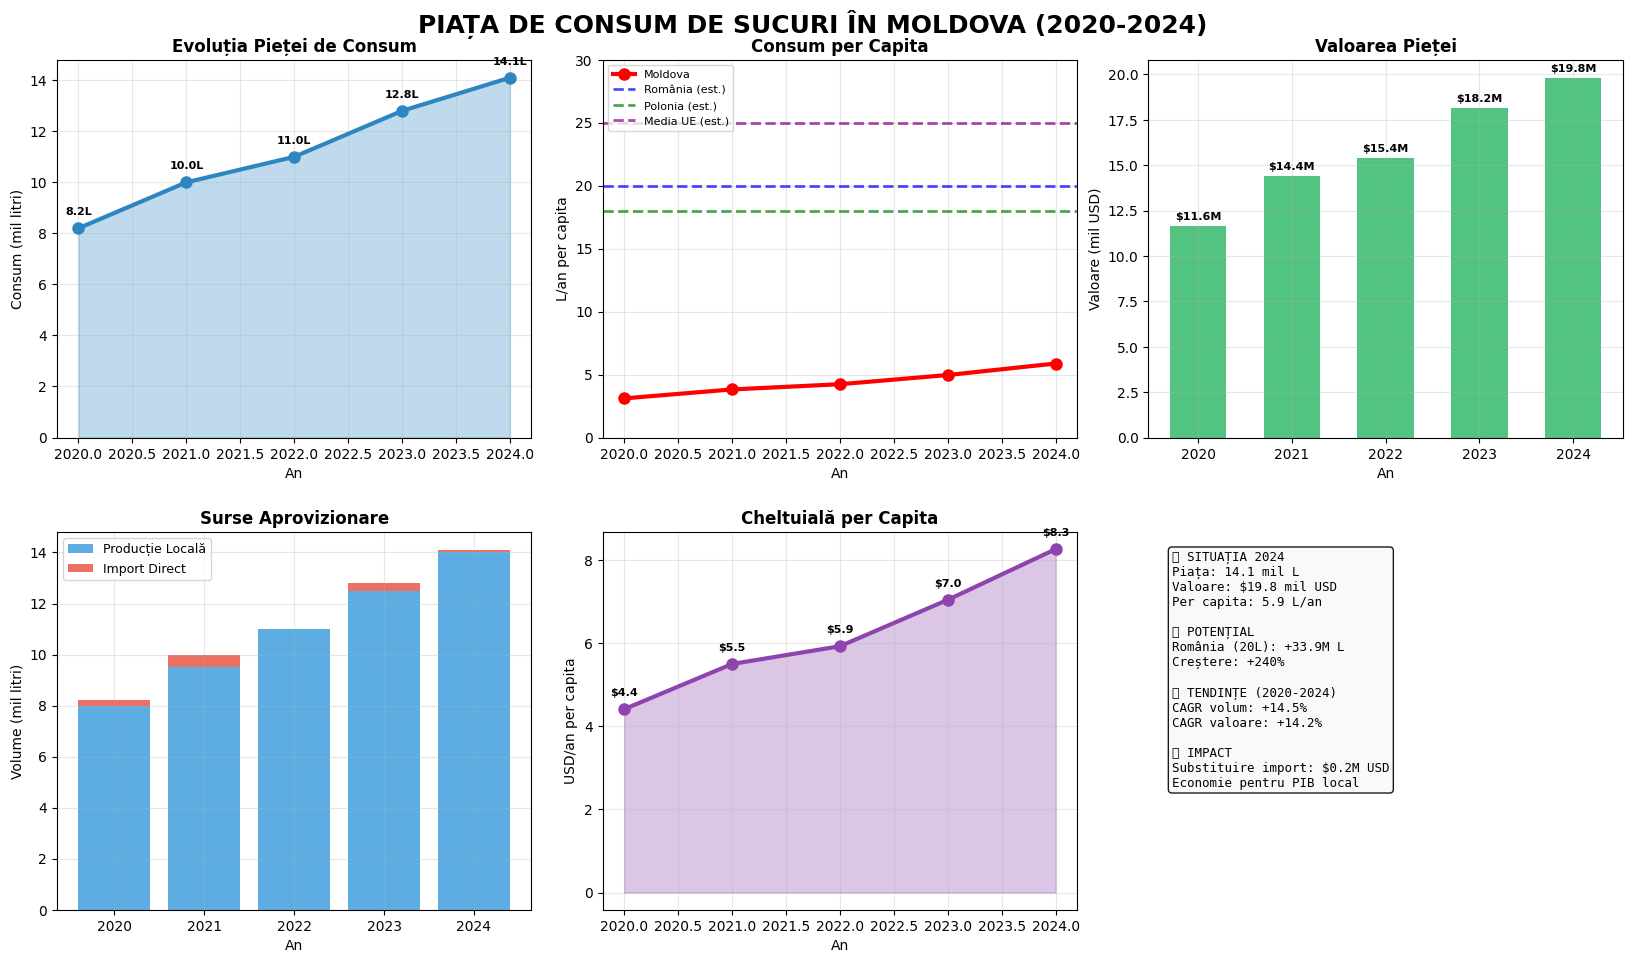

Layout compact generat - spații reduse între grafice!
📊 Piața: 14.1M L | 💰 Valoare: $19.8M USD | 📈 CAGR: +14.5%


In [75]:
# Vizualizarea pieței de consum - layout compact
print("\n=== VIZUALIZAREA PIEȚEI DE CONSUM - COMPACT ===")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('PIAȚA DE CONSUM DE SUCURI ÎN MOLDOVA (2020-2024)', 
             fontsize=18, fontweight='bold', y=0.98)

# Graf 1: Evoluția pieței de consum
axes[0,0].plot(df_piata_reala['An'], df_piata_reala['Piata_totala_mil_L'], 
               'b-o', linewidth=3, markersize=8, color='#2E86C1')
axes[0,0].fill_between(df_piata_reala['An'], df_piata_reala['Piata_totala_mil_L'], 
                       alpha=0.3, color='#2E86C1')
axes[0,0].set_title('Evoluția Pieței de Consum', fontweight='bold', fontsize=12)
axes[0,0].set_xlabel('An', fontsize=10)
axes[0,0].set_ylabel('Consum (mil litri)', fontsize=10)
axes[0,0].grid(True, alpha=0.3)
axes[0,0].set_ylim(0, None)

# Adăugăm valorile pe puncte
for i, row in df_piata_reala.iterrows():
    axes[0,0].annotate(f"{row['Piata_totala_mil_L']:.1f}L", 
                       xy=(row['An'], row['Piata_totala_mil_L']),
                       xytext=(0, 8), textcoords='offset points',
                       ha='center', va='bottom', fontweight='bold', fontsize=8)

# Graf 2: Consum per capita vs țări vecine
axes[0,1].plot(df_piata_reala['An'], df_piata_reala['Consum_per_capita_L'], 
               'ro-', linewidth=3, markersize=8, label='Moldova', zorder=5)
axes[0,1].axhline(y=20, color='blue', linestyle='--', linewidth=2, label='România (est.)', alpha=0.7)
axes[0,1].axhline(y=18, color='green', linestyle='--', linewidth=2, label='Polonia (est.)', alpha=0.7) 
axes[0,1].axhline(y=25, color='purple', linestyle='--', linewidth=2, label='Media UE (est.)', alpha=0.7)
axes[0,1].set_title('Consum per Capita', fontweight='bold', fontsize=12)
axes[0,1].set_xlabel('An', fontsize=10)
axes[0,1].set_ylabel('L/an per capita', fontsize=10)
axes[0,1].legend(fontsize=8, loc='upper left')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].set_ylim(0, 30)

# Graf 3: Valoarea pieței de consum
bars = axes[0,2].bar(df_piata_reala['An'], df_piata_reala['Valoare_totala_mil_USD'], 
                     color='#28B463', alpha=0.8, width=0.6)
axes[0,2].set_title('Valoarea Pieței', fontweight='bold', fontsize=12)
axes[0,2].set_xlabel('An', fontsize=10)
axes[0,2].set_ylabel('Valoare (mil USD)', fontsize=10)
axes[0,2].grid(True, alpha=0.3)

# Adăugăm valorile pe bare
for bar in bars:
    height = bar.get_height()
    axes[0,2].annotate(f"${height:.1f}M", 
                       xy=(bar.get_x() + bar.get_width()/2, height),
                       xytext=(0, 3), textcoords='offset points',
                       ha='center', va='bottom', fontweight='bold', fontsize=8)

# Graf 4: Structura surselor
bars1 = axes[1,0].bar(df_piata_reala['An'], df_piata_reala['Productie_locala_mil_L'], 
                      label='Producție Locală', color='#3498DB', alpha=0.8)
bars2 = axes[1,0].bar(df_piata_reala['An'], df_piata_reala['Import_direct_mil_L'], 
                      bottom=df_piata_reala['Productie_locala_mil_L'],
                      label='Import Direct', color='#E74C3C', alpha=0.8)
axes[1,0].set_title('Surse Aprovizionare', fontweight='bold', fontsize=12)
axes[1,0].set_xlabel('An', fontsize=10)
axes[1,0].set_ylabel('Volume (mil litri)', fontsize=10)
axes[1,0].legend(fontsize=9, loc='upper left')
axes[1,0].grid(True, alpha=0.3)

# Graf 5: Cheltuială per capita
axes[1,1].plot(df_piata_reala['An'], df_piata_reala['Valoare_per_capita_USD'], 
               'go-', linewidth=3, markersize=8, color='#8E44AD')
axes[1,1].fill_between(df_piata_reala['An'], df_piata_reala['Valoare_per_capita_USD'], 
                       alpha=0.3, color='#8E44AD')
axes[1,1].set_title('Cheltuială per Capita', fontweight='bold', fontsize=12)
axes[1,1].set_xlabel('An', fontsize=10)
axes[1,1].set_ylabel('USD/an per capita', fontsize=10)
axes[1,1].grid(True, alpha=0.3)

# Adăugăm valorile
for i, row in df_piata_reala.iterrows():
    axes[1,1].annotate(f"${row['Valoare_per_capita_USD']:.1f}", 
                       xy=(row['An'], row['Valoare_per_capita_USD']),
                       xytext=(0, 8), textcoords='offset points',
                       ha='center', va='bottom', fontweight='bold', fontsize=8)

# Graf 6: Informații compacte
axes[1,2].axis('off')

# Text compact organizat
piata_actuala_2024 = ultima_linie['Piata_totala_mil_L']
potential_romania = 20 * 2.4 - piata_actuala_2024

compact_info = f"""📊 SITUAȚIA 2024
Piața: {piata_actuala_2024:.1f} mil L
Valoare: ${ultima_linie['Valoare_totala_mil_USD']:.1f} mil USD
Per capita: {ultima_linie['Consum_per_capita_L']:.1f} L/an

🎯 POTENȚIAL
România (20L): +{potential_romania:.1f}M L
Creștere: +{(potential_romania/piata_actuala_2024*100):.0f}%

📈 TENDINȚE (2020-2024)
CAGR volum: {piata_cagr:+.1f}%
CAGR valoare: {cagr_calc(df_piata_reala.iloc[0]['Valoare_totala_mil_USD'], df_piata_reala.iloc[-1]['Valoare_totala_mil_USD'], 4):+.1f}%

💰 IMPACT
Substituire import: ${import_substituit * pret_import_direct:.1f}M USD
Economie pentru PIB local"""

axes[1,2].text(0.05, 0.95, compact_info, transform=axes[1,2].transAxes, 
               fontsize=9, verticalalignment='top', fontfamily='monospace',
               bbox=dict(boxstyle="round,pad=0.3", facecolor="#F8F9FA", alpha=0.9))

# Layout compact - spații mici
plt.subplots_adjust(left=0.08, right=0.95, top=0.93, bottom=0.08, 
                    wspace=0.15, hspace=0.25)

plt.show()

print("Layout compact generat - spații reduse între grafice!")
print(f"📊 Piața: {piata_actuala_2024:.1f}M L | 💰 Valoare: ${ultima_linie['Valoare_totala_mil_USD']:.1f}M USD | 📈 CAGR: {piata_cagr:+.1f}%")


=== SCENARIILE DE DEZVOLTARE A PIEȚEI ===


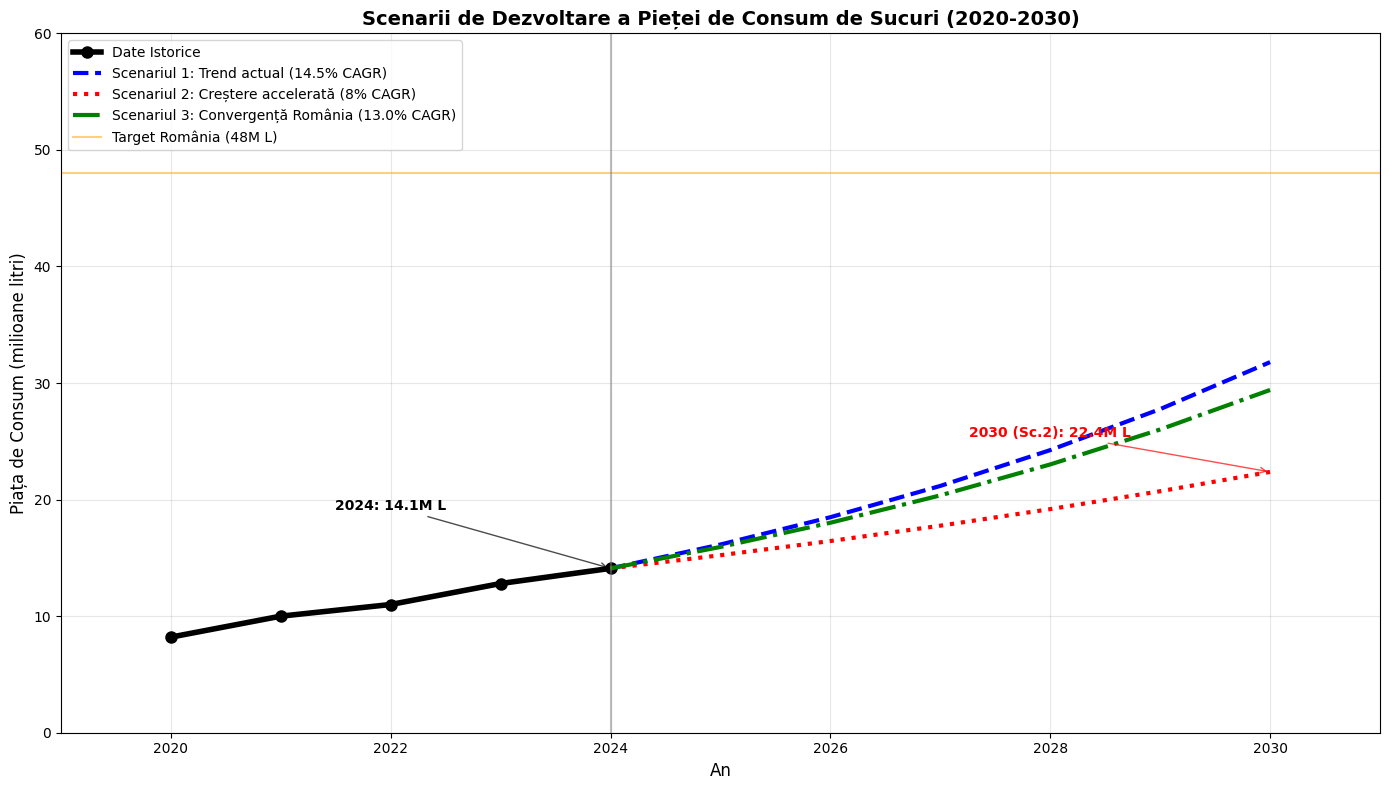


Tabelul scenariilor (milioane litri):
An	Istoric/Sc.1	Scenariul 2	Scenariul 3
---------------------------------------------
2020	     8.2	         -	         -
2021	    10.0	         -	         -
2022	    11.0	         -	         -
2023	    12.8	         -	         -
2024	    14.1	         -	         -
2025	    16.1	      15.2	      15.9
2026	    18.5	      16.4	      18.0
2027	    21.2	      17.8	      20.4
2028	    24.2	      19.2	      23.0
2029	    27.8	      20.7	      26.0
2030	    31.8	      22.4	      29.4


In [65]:
# Grafic special: Scenariile de dezvoltare a pieței de consum
print("\n=== SCENARIILE DE DEZVOLTARE A PIEȚEI ===")

fig, ax = plt.subplots(1, 1, figsize=(14, 8))

# Anii pentru prognoză
ani_prognoza = list(range(2020, 2031))
piata_istorica = df_piata_reala['Piata_totala_mil_L'].tolist()

# Completăm cu prognoze pentru 2025-2030
piata_2024 = ultima_linie['Piata_totala_mil_L']

# Scenariul 1: Menținerea trendului actual (CAGR actual)
scenariul_1 = piata_istorica + [piata_2024 * (1 + piata_cagr/100) ** (an - 2024) for an in range(2025, 2031)]

# Scenariul 2: Creștere accelerată prin investiții (8% anual)
scenariul_2 = piata_istorica + [piata_2024 * (1.08) ** (an - 2024) for an in range(2025, 2031)]

# Scenariul 3: Convergența către nivelul României în 10 ani
target_romania_2034 = 20 * 2.4  # 48M litri
cagr_romania = ((target_romania_2034 / piata_2024) ** (1/10) - 1)
scenariul_3 = piata_istorica + [piata_2024 * (1 + cagr_romania) ** (an - 2024) for an in range(2025, 2031)]

# Plotarea scenariilor
ax.plot(ani_prognoza[:5], piata_istorica, 'ko-', linewidth=4, markersize=8, label='Date Istorice')
ax.plot(ani_prognoza[4:], scenariul_1[4:], 'b--', linewidth=3, label=f'Scenariul 1: Trend actual ({piata_cagr:.1f}% CAGR)')
ax.plot(ani_prognoza[4:], scenariul_2[4:], 'r:', linewidth=3, label='Scenariul 2: Creștere accelerată (8% CAGR)')
ax.plot(ani_prognoza[4:], scenariul_3[4:], 'g-.', linewidth=3, label=f'Scenariul 3: Convergență România ({cagr_romania*100:.1f}% CAGR)')

# Marcăm punctele cheie
ax.axhline(y=20*2.4, color='orange', linestyle='-', alpha=0.5, label='Target România (48M L)')
ax.axvline(x=2024, color='gray', linestyle='-', alpha=0.5)

# Formatarea graficului
ax.set_title('Scenarii de Dezvoltare a Pieței de Consum de Sucuri (2020-2030)', 
             fontweight='bold', fontsize=14)
ax.set_xlabel('An', fontsize=12)
ax.set_ylabel('Piața de Consum (milioane litri)', fontsize=12)
ax.legend(loc='upper left', fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_xlim(2019, 2031)
ax.set_ylim(0, 60)

# Adăugăm adnotări pentru valorile cheie
ax.annotate(f'2024: {piata_2024:.1f}M L', 
            xy=(2024, piata_2024), xytext=(2022, piata_2024 + 5),
            arrowprops=dict(arrowstyle='->', color='black', alpha=0.7),
            fontsize=10, ha='center', fontweight='bold')

ax.annotate(f'2030 (Sc.2): {scenariul_2[-1]:.1f}M L', 
            xy=(2030, scenariul_2[-1]), xytext=(2028, scenariul_2[-1] + 3),
            arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
            fontsize=10, ha='center', color='red', fontweight='bold')

plt.tight_layout()
plt.show()

# Tabelul cu valorile pentru scenarii
print("\nTabelul scenariilor (milioane litri):")
print("An\tIstoric/Sc.1\tScenariul 2\tScenariul 3")
print("-" * 45)
for i, an in enumerate(ani_prognoza):
    if an <= 2024:
        print(f"{an}\t{scenariul_1[i]:>8.1f}\t{'-':>10}\t{'-':>10}")
    else:
        idx = i
        print(f"{an}\t{scenariul_1[idx]:>8.1f}\t{scenariul_2[idx]:>10.1f}\t{scenariul_3[idx]:>10.1f}")


=== DASHBOARD PIAȚA DE CONSUM 2024 (CORECTAT) ===


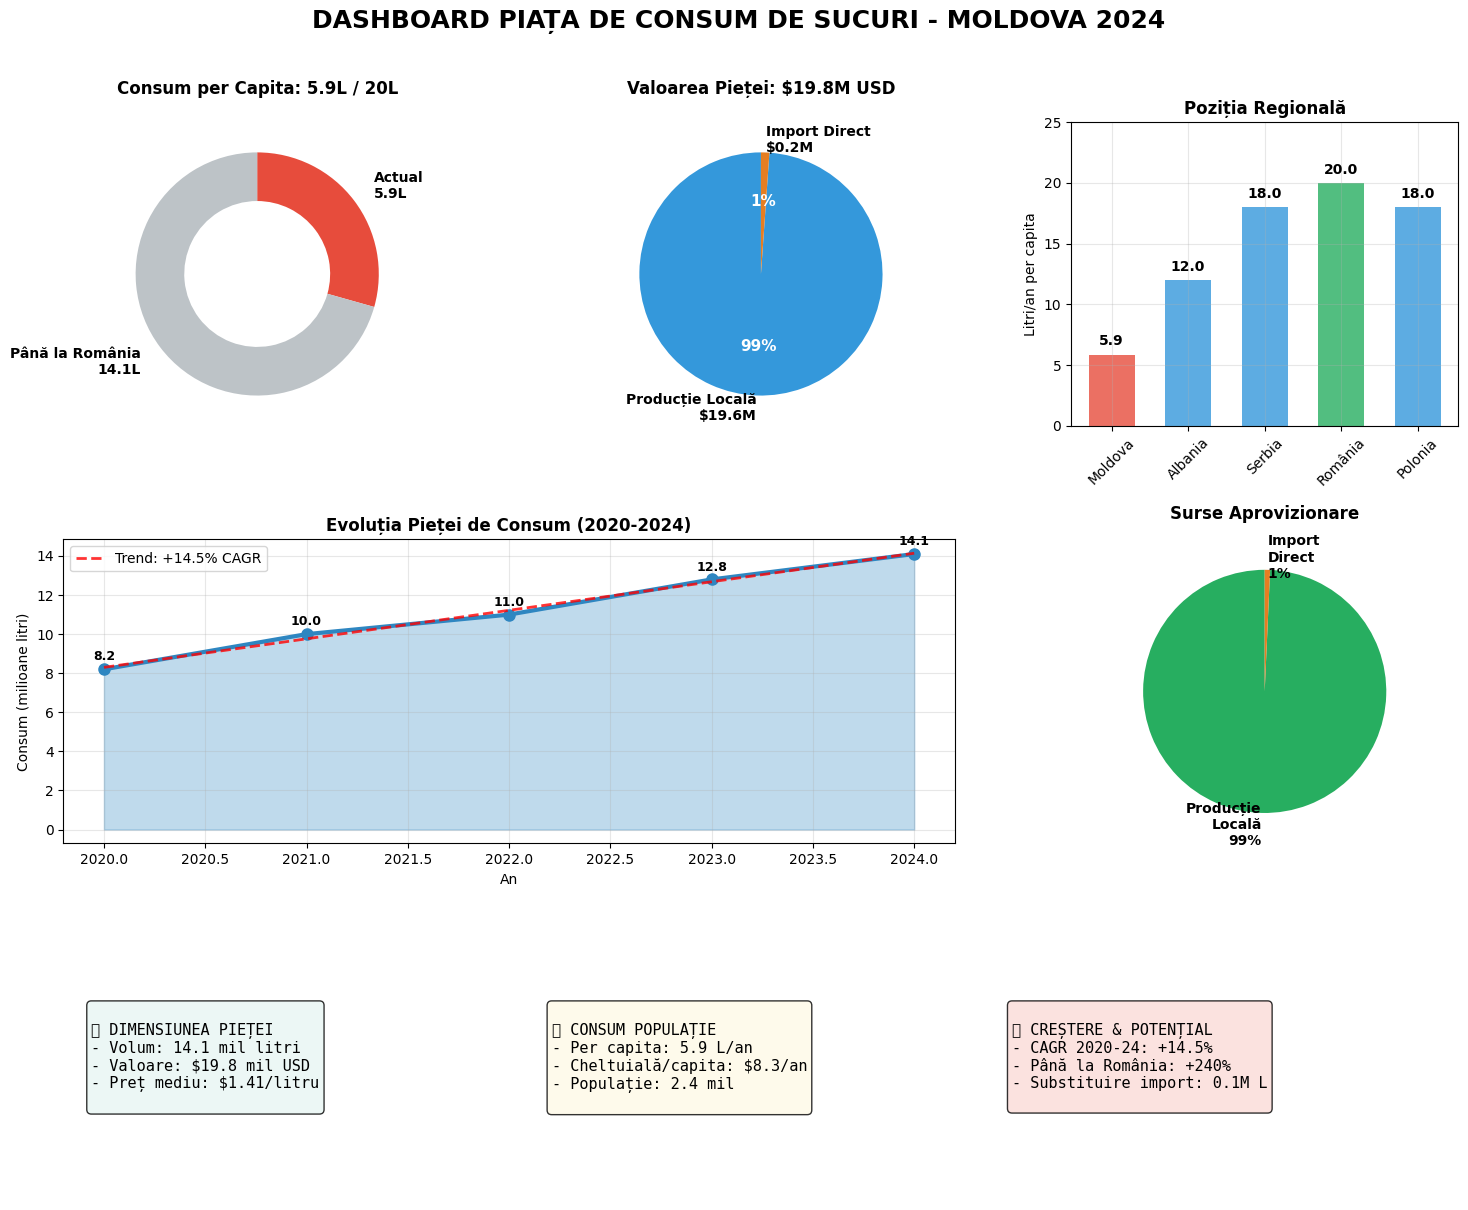

Dashboard-ul corectat a fost generat fără suprapuneri!

🎯 REZUMAT: Piața moldovenească de consum valorează $19.8M USD


In [71]:
# Dashboard correctat fără suprapuneri de text
print("\n=== DASHBOARD PIAȚA DE CONSUM 2024 (CORECTAT) ===")

fig = plt.figure(figsize=(18, 14))

# Creăm un layout personalizat cu mai mult spațiu
gs = fig.add_gridspec(3, 3, hspace=0.4, wspace=0.3, 
                      height_ratios=[1, 1, 0.8], width_ratios=[1, 1, 1])

# 1. Gauge pentru consum per capita vs target
ax1 = fig.add_subplot(gs[0, 0])
actual_consum = ultima_linie['Consum_per_capita_L']
target_romania = 20
restul = target_romania - actual_consum

sizes = [actual_consum, restul]
colors = ['#E74C3C', '#BDC3C7']
labels = [f'Actual\n{actual_consum:.1f}L', f'Până la România\n{restul:.1f}L']

wedges, texts = ax1.pie(sizes, labels=labels, colors=colors, 
                        startangle=90, counterclock=False,
                        wedgeprops=dict(width=0.4), labeldistance=1.2)

# Ajustăm mărimea textului
for text in texts:
    text.set_fontsize(10)
    text.set_fontweight('bold')

ax1.set_title(f'Consum per Capita: {actual_consum:.1f}L / {target_romania}L', 
              fontweight='bold', fontsize=12, pad=20)

# 2. Breakdown valoare piață
ax2 = fig.add_subplot(gs[0, 1])
valori_breakdown = [ultima_linie['Valoare_productie_mil_USD'], 
                   ultima_linie['Valoare_import_mil_USD']]
labels_breakdown = [f'Producție Locală\n${valori_breakdown[0]:.1f}M', 
                   f'Import Direct\n${valori_breakdown[1]:.1f}M']
colors_breakdown = ['#3498DB', '#E67E22']

wedges, texts, autotexts = ax2.pie(valori_breakdown, labels=labels_breakdown, 
                                   colors=colors_breakdown, autopct='%1.0f%%',
                                   startangle=90, labeldistance=1.1)

# Ajustăm textul
for text in texts:
    text.set_fontsize(10)
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')
    autotext.set_color('white')

ax2.set_title(f'Valoarea Pieței: ${ultima_linie["Valoare_totala_mil_USD"]:.1f}M USD', 
              fontweight='bold', fontsize=12, pad=20)

# 3. Comparație regională
ax3 = fig.add_subplot(gs[0, 2])
tari = ['Moldova', 'Albania', 'Serbia', 'România', 'Polonia']
consum_tari = [ultima_linie['Consum_per_capita_L'], 12, 18, 20, 18]
colors_tari = ['#E74C3C', '#3498DB', '#3498DB', '#27AE60', '#3498DB']

bars = ax3.bar(tari, consum_tari, color=colors_tari, alpha=0.8, width=0.6)
ax3.set_title('Poziția Regională', fontweight='bold', fontsize=12)
ax3.set_ylabel('Litri/an per capita', fontsize=10)
ax3.grid(True, alpha=0.3)
ax3.set_ylim(0, 25)

# Rotim etichetele pentru a nu se suprapună
ax3.tick_params(axis='x', rotation=45)

# Adăugăm valorile pe bare cu poziționare mai bună
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}', ha='center', va='bottom', 
             fontweight='bold', fontsize=10)

# 4. Evoluția pieței (grafic linie)
ax4 = fig.add_subplot(gs[1, :2])  # Ocupă 2 coloane
ax4.plot(df_piata_reala['An'], df_piata_reala['Piata_totala_mil_L'], 
         'bo-', linewidth=3, markersize=8, color='#2E86C1')
ax4.fill_between(df_piata_reala['An'], df_piata_reala['Piata_totala_mil_L'], 
                 alpha=0.3, color='#2E86C1')

# Adăugăm linia de trend
z = np.polyfit(df_piata_reala['An'], df_piata_reala['Piata_totala_mil_L'], 1)
p = np.poly1d(z)
ax4.plot(df_piata_reala['An'], p(df_piata_reala['An']), 
         "r--", alpha=0.8, linewidth=2, label=f'Trend: {piata_cagr:+.1f}% CAGR')

ax4.set_title('Evoluția Pieței de Consum (2020-2024)', fontweight='bold', fontsize=12)
ax4.set_xlabel('An', fontsize=10)
ax4.set_ylabel('Consum (milioane litri)', fontsize=10)
ax4.legend()
ax4.grid(True, alpha=0.3)

# Adăugăm valorile pe puncte
for i, row in df_piata_reala.iterrows():
    ax4.text(row['An'], row['Piata_totala_mil_L'] + 0.3, 
             f"{row['Piata_totala_mil_L']:.1f}", 
             ha='center', va='bottom', fontweight='bold', fontsize=9)

# 5. Structura surselor
ax5 = fig.add_subplot(gs[1, 2])
productie_procent = (ultima_linie['Productie_locala_mil_L'] / ultima_linie['Piata_totala_mil_L']) * 100
import_procent = (ultima_linie['Import_direct_mil_L'] / ultima_linie['Piata_totala_mil_L']) * 100

labels_surse = [f'Producție\nLocală\n{productie_procent:.0f}%', 
                f'Import\nDirect\n{import_procent:.0f}%']
sizes_surse = [productie_procent, import_procent]
colors_surse = ['#27AE60', '#E67E22']

wedges, texts = ax5.pie(sizes_surse, labels=labels_surse, colors=colors_surse,
                        startangle=90, labeldistance=1.1)

for text in texts:
    text.set_fontsize(10)
    text.set_fontweight('bold')

ax5.set_title('Surse Aprovizionare', fontweight='bold', fontsize=12, pad=15)

# 6. Indicatori cheie (în partea de jos, mai organizat)
ax6 = fig.add_subplot(gs[2, :])  # Ocupă toată linia de jos
ax6.axis('off')

# Împărțim indicatorii în coloane pentru claritate
col1_text = f"""
📊 DIMENSIUNEA PIEȚEI
- Volum: {ultima_linie['Piata_totala_mil_L']:.1f} mil litri
- Valoare: ${ultima_linie['Valoare_totala_mil_USD']:.1f} mil USD
- Preț mediu: ${ultima_linie['Valoare_totala_mil_USD']/ultima_linie['Piata_totala_mil_L']:.2f}/litru
"""

col2_text = f"""
👥 CONSUM POPULAȚIE
- Per capita: {ultima_linie['Consum_per_capita_L']:.1f} L/an
- Cheltuială/capita: ${ultima_linie['Valoare_per_capita_USD']:.1f}/an
- Populație: {ultima_linie['Populatie_mil']:.1f} mil
"""

col3_text = f"""
📈 CREȘTERE & POTENȚIAL
- CAGR 2020-24: {piata_cagr:+.1f}%
- Până la România: +{((20*2.4/ultima_linie['Piata_totala_mil_L'])-1)*100:.0f}%
- Substituire import: {import_substituit:.1f}M L
"""

# Plasăm textul în 3 coloane
ax6.text(0.02, 0.8, col1_text, transform=ax6.transAxes, 
         fontsize=11, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="#E8F6F3", alpha=0.8))

ax6.text(0.35, 0.8, col2_text, transform=ax6.transAxes, 
         fontsize=11, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="#FEF9E7", alpha=0.8))

ax6.text(0.68, 0.8, col3_text, transform=ax6.transAxes, 
         fontsize=11, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="#FADBD8", alpha=0.8))

# Titlul principal
plt.suptitle('DASHBOARD PIAȚA DE CONSUM DE SUCURI - MOLDOVA 2024', 
             fontsize=18, fontweight='bold', y=0.96)

plt.show()

print("Dashboard-ul corectat a fost generat fără suprapuneri!")
print(f"\n🎯 REZUMAT: Piața moldovenească de consum valorează ${ultima_linie['Valoare_totala_mil_USD']:.1f}M USD")